## Statistical Modeling, Part 1: Linear Regression

In this exercise, you'll get a chance to practice building and analyzing linear models using the data from the UN exercise.

In [2]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
import matplotlib.pyplot as plt

You'll be working with the combined gdp and life expectancy data.

In [3]:
gdp_le = pd.read_csv('../data/gdp_le.csv').dropna()

In [4]:
gdp_le

,Country,Year,GDP_Per_Capita,Continent,Life_Expectancy
0,Afghanistan,2019,2065.036398,Asia,64.833
1,Afghanistan,2018,2033.779002,Asia,64.486
2,Afghanistan,2017,2058.383832,Asia,64.130
3,Afghanistan,2016,2057.062164,Asia,63.763
4,Afghanistan,2015,2068.265904,Asia,63.377
...,...,...,...,...,...
5109,Zimbabwe,1994,3263.934978,Africa,52.044
5110,Zimbabwe,1993,3033.504852,Africa,53.653
5111,Zimbabwe,1992,3054.889178,Africa,55.243
5112,Zimbabwe,1991,3426.598094,Africa,56.749


### Part 1: Analyzing 2019

For this part, we'll look at our dataset just for the year 2019.

In [5]:
gdp_le_2019 = gdp_le[gdp_le['Year'] == 2019].copy()

Fit a linear regression model on the 2019 data with target variable life expenctancy and predictor variable GDP per capita.

In [30]:
lm = smf.ols('Life_Expectancy ~ GDP_Per_Capita', data = gdp_le ).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.395
Model:                            OLS   Adj. R-squared:                  0.395
Method:                 Least Squares   F-statistic:                     3218.
Date:                Tue, 04 Oct 2022   Prob (F-statistic):               0.00
Time:                        21:11:10   Log-Likelihood:                -16929.
No. Observations:                4922   AIC:                         3.386e+04
Df Residuals:                    4920   BIC:                         3.387e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         63.4826      0.143    444.100      0.000      63.202      63.763
GDP_Per_Capita     0.0003   5.34e-06     56.723      0.000       0.000       0.000
==============================================================================
Omnibus:                      840.298   Durbin-Watson:                   0.073
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1341.386
Skew:                          -1.185   Prob(JB):                    5.27e-292
Kurtosis:                       3.959   Cond. No.                     3.56e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.56e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

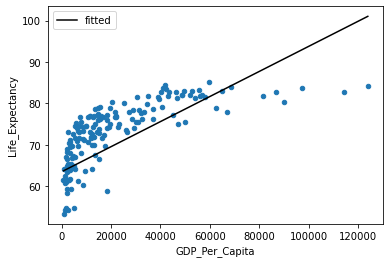

In [31]:
ax = gdp_le_2019.plot(x = 'GDP_Per_Capita', y = 'Life_Expectancy', kind = 'scatter')

fit_df = pd.DataFrame({
    'GDP_Per_Capita': np.linspace(
        start = gdp_le_2019['GDP_Per_Capita'].min(),
        stop = gdp_le_2019['GDP_Per_Capita'].max(), 
        num = 150)})
fit_df['fitted'] = lm.predict(fit_df)

fit_df.plot(x = 'GDP_Per_Capita', y = 'fitted', ax = ax, color = 'black', label = 'fitted');

**Question:** How can we interpret the meaning of the coefficient for GDP_Per_Capita?

Answer: For every 1 unit change in GDP per capita the expected life increases by increases 0.0003

It might make it easier to interpret if we changed the units on GDP_Per_Capita since a one unit change in GDP per capita does not have a very large impact at all on GDP_Per_Capita.

Fit a new model, but this time use thousands of dollars of GDP_Per_Capita as your predictor variable.

**Hint:** Two ways that you can accomplish this are by creating a new column in your DataFrame or by making use of `I()` in your formula.

In [23]:
gdp_le['GDP_Per_Capita_1000s'] = gdp_le['GDP_Per_Capita'] / 1000


In [24]:
lm = smf.ols('Life_Expectancy ~ GDP_Per_Capita_1000s', data=gdp_le).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.395
Model:                            OLS   Adj. R-squared:                  0.395
Method:                 Least Squares   F-statistic:                     3218.
Date:                Tue, 04 Oct 2022   Prob (F-statistic):               0.00
Time:                        20:51:18   Log-Likelihood:                -16929.
No. Observations:                4922   AIC:                         3.386e+04
Df Residuals:                    4920   BIC:                         3.387e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               63.4826      0.143    444.100      0.000      63.202      63.763
GDP_Per_Capita_1000s     0.3028      0.005     56.723      0.000       0.292       0.313
==============================================================================
Omnibus:                      840.298   Durbin-Watson:                   0.073
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1341.386
Skew:                          -1.185   Prob(JB):                    5.27e-292
Kurtosis:                       3.959   Cond. No.                         35.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Questions:** How do we interpret the meaning of the coefficients for the new model?

Answer: For every 1 unit change in GDP per capita the life expectancy increases 0.3028

Now, let's plot the fitted values against the original data.

**Question:** What potential problems do you see with this fit?

Answer: 

You saw from the guided exploration portion of the project that using the logarithm of the GDP resulted in a larger correlation value. 

Fit a new model using the log of GDP Per Capita as a predictor variable.

**Hint:** You can do this by using `'Life_Expectancy ~ np.log(GDP_Per_Capita)'` as your formula.

In [32]:
lm = smf.ols('Life_Expectancy ~ np.log(GDP_Per_Capita)', data=gdp_le).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Life_Expectancy   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                 1.013e+04
Date:                Tue, 04 Oct 2022   Prob (F-statistic):               0.00
Time:                        21:13:51   Log-Likelihood:                -15415.
No. Observations:                4922   AIC:                         3.083e+04
Df Residuals:                    4920   BIC:                         3.085e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  9.0255      0.599     15.058      0.000       7.850      10.201
np.log(GDP_Per_Capita)     6.5481      0.065    100.652      0.000       6.421       6.676
==============================================================================
Omnibus:                      995.021   Durbin-Watson:                   0.080
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2187.126
Skew:                          -1.160   Prob(JB):                         0.00
Kurtosis:                       5.298   Cond. No.                         70.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Difficult Question:** How do we interpret the meaning of the coefficient for log(GDP_Per_Capita)?

For every unit of log in GDP per capita the life expectancy increases by 6.5481

Let's look at the plot of our fitted values against the data.

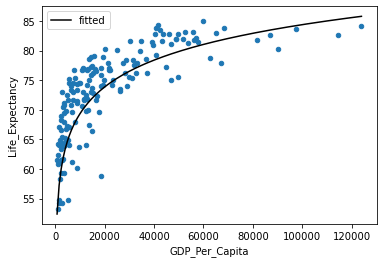

In [33]:
ax = gdp_le_2019.plot(x = 'GDP_Per_Capita', y = 'Life_Expectancy', kind = 'scatter')

fit_df = pd.DataFrame({
    'GDP_Per_Capita': np.linspace(
        start = gdp_le_2019['GDP_Per_Capita'].min(),
        stop = gdp_le_2019['GDP_Per_Capita'].max(), 
        num = 150)})
fit_df['fitted'] = lm.predict(fit_df)

fit_df.plot(x = 'GDP_Per_Capita', y = 'fitted', ax = ax, color = 'black', label = 'fitted');

We can also look on the log scale.

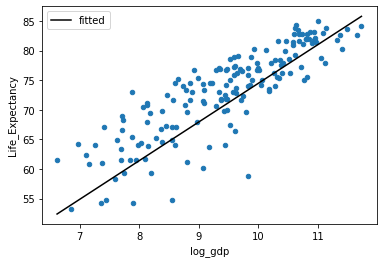

In [34]:
gdp_le_2019['log_gdp'] = np.log(gdp_le_2019['GDP_Per_Capita'])

ax = gdp_le_2019.plot(x = 'log_gdp', y = 'Life_Expectancy', kind = 'scatter')

fit_df = pd.DataFrame({
    'GDP_Per_Capita': np.linspace(
        start = gdp_le_2019['GDP_Per_Capita'].min(),
        stop = gdp_le_2019['GDP_Per_Capita'].max(), 
        num = 150)})
fit_df['log_gdp'] = np.log(fit_df['GDP_Per_Capita'])
fit_df['fitted'] = lm.predict(fit_df)

fit_df.plot(x = 'log_gdp', y = 'fitted', ax = ax, color = 'black', label = 'fitted');

## Part 2: Life Expectancy Over Time

Now, let's explore the relationship between health and wealth over time.

First, using all data in gdp_le, fit a model for life expectancy based on number of years since 1990. (Hint: make use of I()) to help with this.

In [37]:
gdp_1990 = gdp_le.loc[(gdp_le['Year']>= 1990) & (gdp_le['Year'] <= 2017)]




In [39]:
lm = smf.ols('Life_Expectancy ~ I(gdp_1990)', data = gdp_le)
lm.summary()

PatsyError: categorical data cannot be >1-dimensional

**Question:** How can you interpret the meaning of both of the coefficients of this model?

We can compare the fit model to the data.

In [ ]:
ax = gdp_le.plot(kind = 'scatter', x = 'Year', y = 'Life_Expectancy', alpha = 0.5)

fit_df = pd.DataFrame({
    'Year': np.linspace(
        start = gdp_le['Year'].min(),
        stop = gdp_le['Year'].max(), 
        num = 150)})
fit_df['fitted'] = lm.predict(fit_df)

fit_df.plot(x = 'Year', y = 'fitted', ax = ax, color = 'black', label = 'fitted');

Perhaps we could do better if we include continent in our model. Fit a model which includes a term for Continent. (Don't include any interactions yet).

In [ ]:
lm_continent = # Fill this in
lm_continent.summary()

**Questions:**

1. Is including a term for continent statistically significant?
2. How do you interpret the meaning of the model coefficients?
3. What does the model say about European vs. Asian vs. African countries with respect to life expectancy in 1990 and the increase over time of life expectancy?

In [ ]:
# Fill in the code to check if the term for continent is significant

Adjust the `continent` variable below to see the fitted vs. actual values by continent. What do you notice?

In [ ]:
continent = 'Asia'

sub_df = gdp_le[gdp_le['Continent'] == continent]

ax = sub_df.plot(x = 'Year', 
                 y = 'Life_Expectancy',
                 kind = 'scatter',
                 title = continent,
                 alpha = 0.6)

fit_df = pd.DataFrame({
    'Year': np.linspace(start = sub_df['Year'].min(),
                                  stop = sub_df['Year'].max()
                                 ),
    'Continent': continent
})
fit_df['fitted'] = lm_continent.predict(fit_df)
fit_df.plot(x = 'Year', y = 'fitted', ax = ax, color = 'black', label = 'fitted');

Now, add an interaction term between Continent and Year to your model.

In [ ]:
lm_continent_int = # Fill This in
lm_continent_int.summary()

**Questions:** 
1. Are the interaction terms statistically significant?
2. What does the model say about European vs. Asian vs. African countries with respect to life expectancy in 1990 and the increase over time of life expectancy?

In [ ]:
# Fill in the code to check if the interaction terms are significant

You can uses the code in the next cell to explore the output from the new model.

In [ ]:
continent = 'Asia'

sub_df = gdp_le[gdp_le['Continent'] == continent]

ax = sub_df.plot(x = 'Year', 
                 y = 'Life_Expectancy',
                 kind = 'scatter',
                 title = continent,
                 alpha = 0.6)

fit_df = pd.DataFrame({
    'Year': np.linspace(start = sub_df['Year'].min(),
                        stop = sub_df['Year'].max()
                       ),
    'Continent': continent
})
fit_df['fitted_no_interactions'] = lm_continent.predict(fit_df)
fit_df['fitted_interactions'] = lm_continent_int.predict(fit_df)
fit_df.plot(x = 'Year', y = 'fitted_no_interactions', ax = ax, color = 'black', label = 'fitted_no_interactions')
fit_df.plot(x = 'Year', y = 'fitted_interactions', ax = ax, color = 'blue', label = 'fitted_interactions');

## Part 3: The Effect of Wealth on Health

Now, let's try and uncover the effect of wealth on health, after accounting for the effect of Continent and year.

Fit a model that builds off of your previous model but includes a term for the log of gdp per capita.

In [ ]:
lm_gdp = # Fill this in
lm_gdp.summary()

**Question:** How do we interpret the coefficient of log(gdp)?

In [ ]:
gdp_le['log_gdp'] = np.log(gdp_le['GDP_Per_Capita'])

The resulting model looks at gdp vs. life expectancy by continent. You can explore how the fitted values compare to the actual values by adjusting the values for year and continent below.

In [ ]:
year = 2019
continent = 'Asia'

sub_df = gdp_le[(gdp_le['Year'] == year) & (gdp_le['Continent'] == continent)]

ax = sub_df.plot(x = 'log_gdp', y = 'Life_Expectancy', kind = 'scatter', title = f'{continent}, {year}')

fit_df = pd.DataFrame({
    'Year': year,
    'Continent': continent,
    'GDP_Per_Capita': np.linspace(start = sub_df['GDP_Per_Capita'].min(),
                                  stop = sub_df['GDP_Per_Capita'].max()
                                 )
})
fit_df['fitted'] = lm_gdp.predict(fit_df)
fit_df['log_gdp'] = np.log(fit_df['GDP_Per_Capita'])
fit_df.plot(x = 'log_gdp', y = 'fitted', ax = ax, color = 'black', label = 'fitted');

Perhaps we could estimate different effects of gdp per continent. Add an interaction term between continent and gdp.

In [ ]:
lm_gdp_cont = #Your Code Here
lm_gdp_cont.summary()

**Questions:** 
1. Are the new interaction terms statistically significant?
2. What does the model say about European vs. Asian vs. African countries with respect to the effect of gdp on life expectancy?

In [ ]:
# Fill in the code to check if the interaction term is significant

In [ ]:
year = 2007
continent = 'Africa'

sub_df = gdp_le[(gdp_le['Year'] == year) & (gdp_le['Continent'] == continent)]

ax = sub_df.plot(x = 'log_gdp', y = 'Life_Expectancy', kind = 'scatter', title = continent)

fit_df = pd.DataFrame({
    'Year': year,
    'Continent': continent,
    'GDP_Per_Capita': np.linspace(start = sub_df['GDP_Per_Capita'].min(),
                                  stop = sub_df['GDP_Per_Capita'].max()
                                 )
})
fit_df['fitted_no_interactions'] = lm_gdp.predict(fit_df)
fit_df['fitted_interactions'] = lm_gdp_cont.predict(fit_df)
fit_df['log_gdp'] = np.log(fit_df['GDP_Per_Capita'])
fit_df.plot(x = 'log_gdp', y = 'fitted_no_interactions', ax = ax, color = 'black', label = 'fitted_no_interactions');
fit_df.plot(x = 'log_gdp', y = 'fitted_interactions', ax = ax, color = 'blue', label = 'fitted_interactions');

Finally, add an interaction term between log(gdp) and year.

In [ ]:
lm_gdp_cont_year = smf.ols('Life_Expectancy ~ I(Year - 1990) + Continent + Continent:(I(Year - 1990) + np.log(GDP_Per_Capita)) + np.log(GDP_Per_Capita) + np.log(GDP_Per_Capita):I(Year - 1990)', data = gdp_le).fit()
lm_gdp_cont_year.summary()

**Question:** How do we interpret the new interaction term?

In [ ]:
year = 2015
continent = 'Asia'

sub_df = gdp_le[(gdp_le['Year'] == year) & (gdp_le['Continent'] == continent)]

ax = sub_df.plot(x = 'log_gdp', y = 'Life_Expectancy', kind = 'scatter', title = continent)

fit_df = pd.DataFrame({
    'Year': year,
    'Continent': continent,
    'GDP_Per_Capita': np.linspace(start = sub_df['GDP_Per_Capita'].min(),
                                  stop = sub_df['GDP_Per_Capita'].max()
                                 )
})
fit_df['year_interaction'] = lm_gdp_cont_year.predict(fit_df)
fit_df['no_year_interaction'] = lm_gdp_cont.predict(fit_df)
fit_df['log_gdp'] = np.log(fit_df['GDP_Per_Capita'])
fit_df.plot(x = 'log_gdp', y = 'no_year_interaction', ax = ax, color = 'black', label = 'no_year_interaction');
fit_df.plot(x = 'log_gdp', y = 'year_interaction', ax = ax, color = 'blue', label = 'year_interaction');